In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
ad_details = pd.read_csv("ad_details.csv")
ad_events = pd.read_csv("ad_events.csv")
customer_profiles = pd.read_csv("customer_profiles.csv")

In [2]:
(ad_details.head(), ad_events.head(), customer_profiles.head())

(   reward                              channels  required_amount  \
 0      10         ['email', 'mobile', 'social']               10   
 1      10  ['web', 'email', 'mobile', 'social']               10   
 2       0            ['web', 'email', 'mobile']                0   
 3       5            ['web', 'email', 'mobile']                5   
 4       5                      ['web', 'email']               20   
 
    duration (days)     offer_type                             ad id  
 0                7           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
 1                5           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
 2                4  informational  3f207df678b143eea3cee63160fa8bed  
 3                7           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
 4               10       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  ,
                            customer           event  \
 0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
 1  a03223e636434f42ac4c3df47e8bac43  offer r

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans



# Selecting relevant features for clustering
features = ['age', 'income', 'gender']
data_for_clustering = customer_profiles[features].copy()

# Handling missing values if any (filling with median for numerical and mode for categorical)
data_for_clustering['income'] = data_for_clustering['income'].fillna(data_for_clustering['income'].median())

# Encoding categorical data and normalizing numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['gender'])
    ])

# Fit_transform the data
X_preprocessed = preprocessor.fit_transform(data_for_clustering)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_preprocessed)

# Check the cluster sizes to understand distribution
cluster_sizes = pd.Series(kmeans.labels_).value_counts()

cluster_sizes

1    5413
0    4876
2    4536
Name: count, dtype: int64

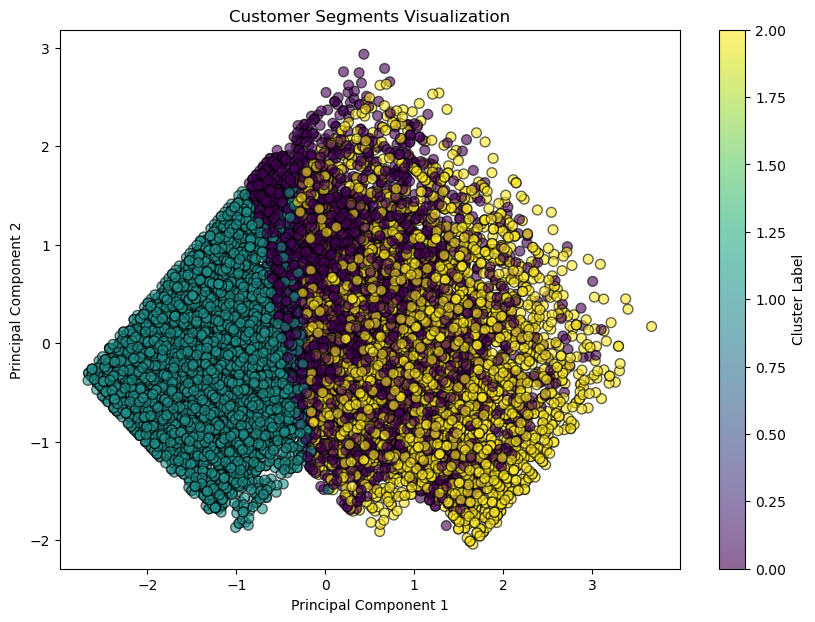

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization, using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Scatter plot of the two principal components colored by cluster label
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Customer Segments Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

plt.show()

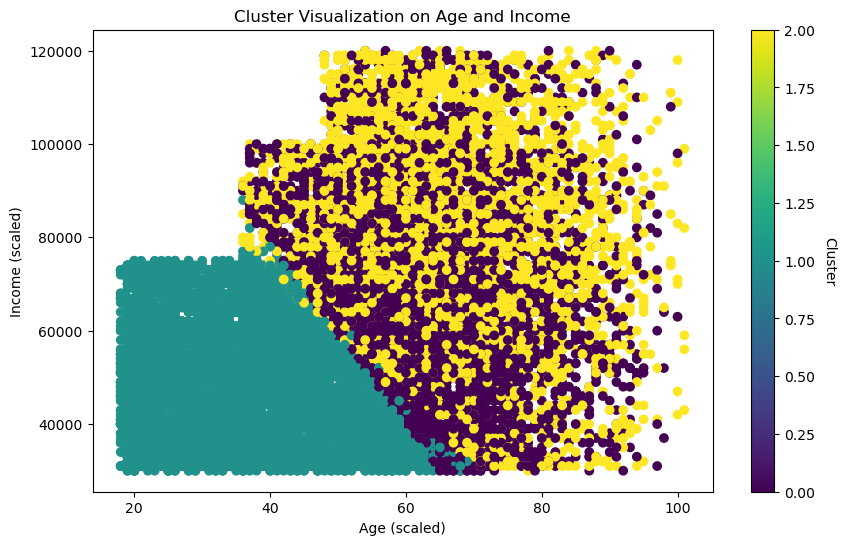

In [5]:
import matplotlib.pyplot as plt

# Your plotting code here
plt.figure(figsize=(10, 6))
plt.scatter(data_for_clustering['age'], data_for_clustering['income'], c=kmeans.labels_, cmap='viridis')
plt.title('Cluster Visualization on Age and Income')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')

# Create colorbar without 'title' keyword
cbar = plt.colorbar()
cbar.set_label('Cluster', rotation=270, labelpad=15)  # Set colorbar label

plt.show()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

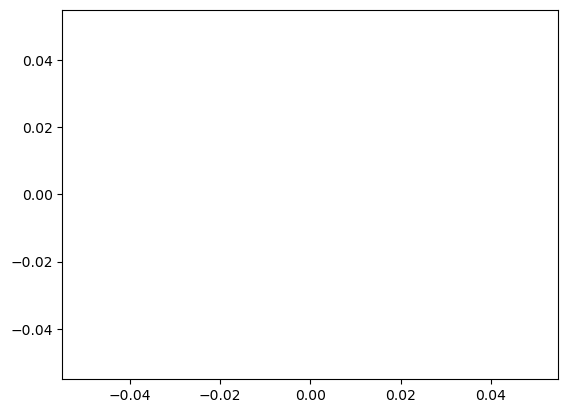

In [14]:
# Determine optimal number of clusters
inertias = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Plotting the elbow graph
frame = pd.DataFrame({"Clusters": range(1, 20), "Inertias": inertias})
sns.lineplot(data=frame, x="Clusters", y="Inertias")
plt.show()

# Fit K-Means with an optimal cluster number found from the elbow method (example: 6)
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)
predictions = kmeans.predict(scaled_df)

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # Use the number of clusters you intend to analyze
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

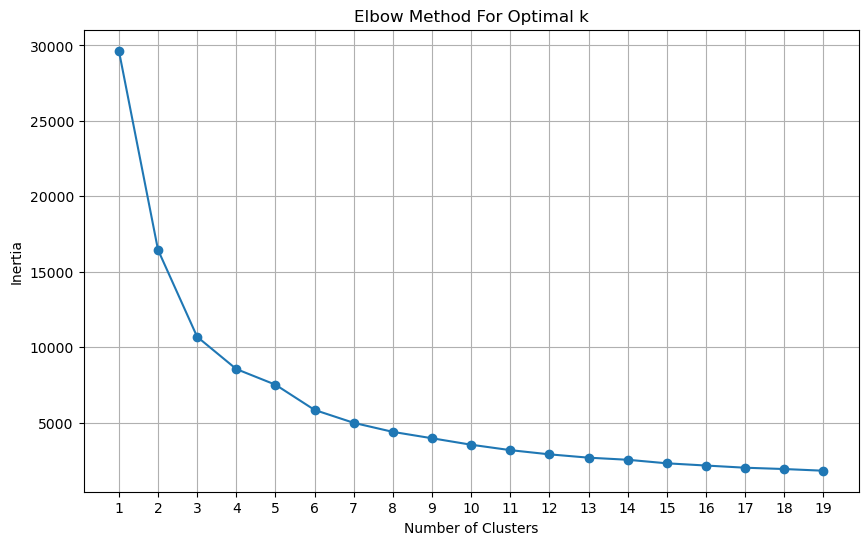

In [33]:
import matplotlib.pyplot as plt

# Assuming 'frame' DataFrame is already created as before
plt.figure(figsize=(10, 6))
plt.plot(frame['Clusters'], frame['Inertias'], marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 20))  # Adjust based on your actual range
plt.grid(True)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [35]:
centers = kmeans.cluster_centers_
unscaled_centers = scaler.inverse_transform(centers)
print(unscaled_centers) 

[[6.60516170e+01 5.25812808e+04]
 [6.21767299e+01 8.91878474e+04]
 [3.51514477e+01 5.24061551e+04]]
